In [463]:
# import libraries
import numpy as np
import pandas as pd
import csv
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# open and read input csv
csv_path = "SubdivisionPersons.csv"
df_detailed = pd.read_csv(csv_path)

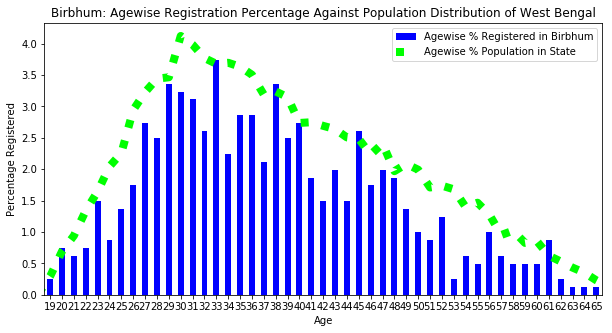

In [464]:
fname = 'BirbhumAgewiseRegistrationDetails.jpg'
if (os.path.isfile(fname)==False):
    df_wb_eleg = df_detailed[['PersonName', 'Age']]
    df_wb_eleg_freq = df_wb_eleg.groupby("Age").count().reset_index()
    df_wb_eleg_freq.rename(columns={'PersonName':'Ferquency'}, inplace=True)
    df_wb_eleg_freq.Ferquency = df_wb_eleg_freq.Ferquency / len(df_wb_eleg) * 100
    df_wb_eleg_freq.rename(columns={'Ferquency':'Agewise % Population in State'}, inplace=True)
    df_wb_eleg_freq.Age = df_wb_eleg_freq.Age - 19
    
    df_birbhum = df_detailed.loc[df_detailed['District'] == 'Birbhum', ].reset_index()
    df_birbhum_reg = df_birbhum.loc[df_birbhum['RegisteredYesNo'] == 'Yes'].reset_index()
    df_birbhum_reg_ages = df_birbhum_reg[['PersonName', 'Age']]
    df_birbhum_reg_ages_freq = df_birbhum_reg_ages.groupby("Age").count().reset_index()
    df_birbhum_reg_ages_freq.rename(columns={'PersonName':'Ferquency'}, inplace=True)
    df_birbhum_reg_ages_freq.Ferquency = df_birbhum_reg_ages_freq.Ferquency / len(df_birbhum) * 100
    df_birbhum_reg_ages_freq.rename(columns={'Ferquency':'Agewise % Registered in Birbhum'}, inplace=True)
    
    fig, ax = plt.subplots()
    df_birbhum_reg_ages_freq.plot(x='Age', y='Agewise % Registered in Birbhum', kind='bar', figsize=(10, 5), color='blue', ax=ax)
    df_wb_eleg_freq.plot(x='Age', y='Agewise % Population in State', kind='line', linewidth=8, linestyle=':', figsize=(10, 5), color='#00ff00', ax=ax)

    plt.title('Birbhum: Agewise Registration Percentage Against Population Distribution of West Bengal')
    plt.ylabel('Percentage Registered')
    plt.xlabel('Age')
    plt.savefig(fname)
else:
    print(fname,': File already exists!')

C:\Users\Sydney\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


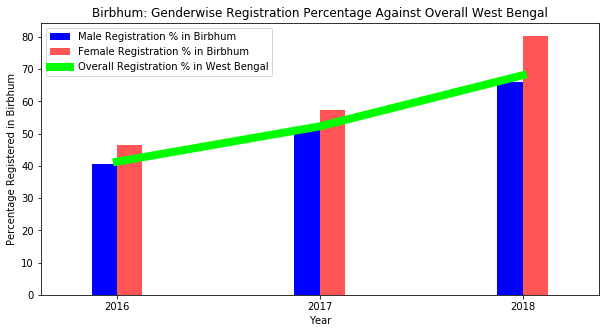

In [483]:
fname = 'BirbhumGenderwiseRegistrationDetails.jpg'
if (os.path.isfile(fname)==False):
    empty_data = np.zeros(shape=(3,3))
    df_counts = pd.DataFrame(empty_data, columns=['DistrictMaleRegistered', 'DistrictFemaleRegistered', 'StateOverallRegistered'])
    df_counts = df_counts.astype(int)
    df_yearly_registration = pd.DataFrame(columns=["Registration"], data=['2016', '2017', '2018'])
    df_counts = pd.concat([df_yearly_registration, df_counts], axis=1)
    StateOverallRegistered2018 = df_detailed['RegisteredYesNo'].loc[df_detailed['RegisteredYesNo'] == 'Yes'].reset_index().shape[0]
    StateOverallRegistered2017 = df_detailed['Registered2017'].loc[df_detailed['Registered2017'] == 'Yes'].reset_index().shape[0]
    StateOverallRegistered2016 = df_detailed['Registered2016'].loc[df_detailed['Registered2016'] == 'Yes'].reset_index().shape[0]
    state_population = df_detailed.shape[0]
    df_counts.iloc[2,3] = StateOverallRegistered2018 / state_population * 100
    df_counts.iloc[1,3] = StateOverallRegistered2017 / state_population * 100
    df_counts.iloc[0,3] = StateOverallRegistered2016 / state_population * 100
    df_distOveralldata = df_detailed.loc[df_detailed['District'] == 'Birbhum'].reset_index(drop=True)
    df_distFemale = df_distOveralldata.loc[df_distOveralldata['Gender'] == 'Female'].reset_index(drop=True)
    df_distMale = df_distOveralldata.loc[df_distOveralldata['Gender'] == 'Male'].reset_index(drop=True)
    distFemaleCount = df_distFemale.shape[0]
    distMaleCount = df_distMale.shape[0]
    district_population = df_distOveralldata.shape[0]
    df_districtReg2018 = df_distOveralldata.loc[df_distOveralldata['RegisteredYesNo'] == 'Yes'].reset_index(drop=True)
    districtReg2018Female = df_districtReg2018.loc[df_districtReg2018['Gender'] == 'Female'].reset_index(drop=True).shape[0]
    districtReg2018Male = df_districtReg2018.loc[df_districtReg2018['Gender'] == 'Male'].reset_index(drop=True).shape[0]
    df_counts.iloc[2,2] = districtReg2018Female / distFemaleCount * 100
    df_counts.iloc[2,1] = districtReg2018Male / distMaleCount * 100
    df_districtReg2017 = df_distOveralldata.loc[df_distOveralldata['Registered2017'] == 'Yes'].reset_index(drop=True)
    districtReg2017Female = df_districtReg2017.loc[df_districtReg2017['Gender'] == 'Female'].reset_index(drop=True).shape[0]
    districtReg2017Male = df_districtReg2017.loc[df_districtReg2017['Gender'] == 'Male'].reset_index(drop=True).shape[0]
    df_counts.iloc[1,2] = districtReg2017Female / distFemaleCount * 100
    df_counts.iloc[1,1] = districtReg2017Male / distMaleCount * 100
    df_districtReg2016 = df_distOveralldata.loc[df_distOveralldata['Registered2016'] == 'Yes'].reset_index(drop=True)
    districtReg2016Female = df_districtReg2016.loc[df_districtReg2016['Gender'] == 'Female'].reset_index(drop=True).shape[0]
    districtReg2016Male = df_districtReg2016.loc[df_districtReg2016['Gender'] == 'Male'].reset_index(drop=True).shape[0]
    df_counts.iloc[0,2] = districtReg2016Female / distFemaleCount * 100
    df_counts.iloc[0,1] = districtReg2016Male / distMaleCount * 100
    df_counts_dist = df_counts[['Registration', 'DistrictMaleRegistered', 'DistrictFemaleRegistered']]
    df_counts_dist.rename(columns={'DistrictMaleRegistered':'Male Registration % in Birbhum', 'DistrictFemaleRegistered':'Female Registration % in Birbhum'}, inplace=True)
    df_counts_state = df_counts[['StateOverallRegistered']]
    df_counts_state.rename(columns={'StateOverallRegistered':'Overall Registration % in West Bengal'}, inplace=True)
    fig, ax = plt.subplots()
    df_counts_dist.plot(x='Registration', kind='bar', figsize=(10, 5), color={'#0000ff', '#ff5555'}, ax=ax, width=0.25)
    df_counts_state.plot(kind='line', linewidth=8, linestyle='-', figsize=(10, 5), color='#00ff00', ax=ax)
    plt.title('Birbhum: Genderwise Registration Percentage Against Overall West Bengal')
    plt.ylabel('Percentage Registered in Birbhum')
    plt.xlabel('Year')
    plt.savefig(fname)
else:
    print(fname,': File already exists!')